In [1]:
#from scipy.stats.mstats import hmean  
import math
import statistics

In [36]:
#hash function
#size=log in base 2 di 4Gb=32
SIZE=32
def hash_fun(string, SIZE):
    out = 0
    for i in range(len(string)):
        out += (ord(string[i])+109)%SIZE
    return '{:032b}'.format(out)

In [172]:
def hyper_log2(f):
   
    stringhe=f.read().split('\n')
    bucket=[[]for i in range (SIZE)]
    bucket_index=0

    for line in range(len(stringhe)):
        a=hash_function_2(stringhe[line],n,A)
        
        bucket_index=int(a[0])*16+int(a[1])*8+int(a[2])*4+int(a[3]) #i primi 4 bit mi danno il bucket
        
        bucket_index=int(bucket_index%SIZE) #per evitare 'index out of bound'
        cont_zero=0 #contatori di zeri
        j=4 #indice per il conteggio degli zeri
        #devo inserire nel bucket il numero di zeri contati da sinistra (j=4 perchè li conto dopo il bucket)
        while a[j]== '0':
            cont_zero +=1
            j +=1
        if not bucket[bucket_index]: #se il bucket nella posizione bucket_index è vuoto
            bucket[bucket_index]=cont_zero#aggiungo il numero di zeri che ho contato
        else : #se il bucket in quella posizione ha già un valore
            bucket[bucket_index]=max(bucket[bucket_index],cont_zero)#scelgo il massimo tra il valore presente nel bucket e quello calcolato
        print(cont_zero,a)
    #la cardinalità è data da 2^(media armonica del numero di zeri)
    print(bucket)
    lista=[]
    for b in bucket:
        if b!=[] and b>0:
            lista.append(b)
    print(lista)
    print(statistics.harmonic_mean(lista))
    media_arm=statistics.harmonic_mean(lista)
    print(media_arm)
    card=2**(media_arm)
    #errore
    err=1.04*math.sqrt(SIZE)
    return card,err
 

statistics.harmonic_mean(list) calcola la media armonica dei valori nel bucket ,noi vogliamo la media armonica di $2^{M[j]} $

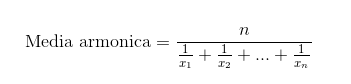

In [5]:
a=[1,2,3]

In [9]:
statistics.harmonic_mean(a)

1.6363636363636365

# Hash function dal pdf di Aris

valori possibili iniziali =16^32 (dominio di partenza)
vogliamo mapparli con 32 bit ,quindi 2^32 possibili combinazioni e valori
2^32=4294967296
il numero n per fare il mod deve essere maggiore e vicino a questo 
ho trovato n=4654223003 ma si puo scegliere un numero intorno a questo 

In [22]:
import random 
import numpy as np

In base esadecimale 'a'=10,'b'=11,'c'=12,'d'=13,'e'=14,'f'=15

Creiamo un dizionario di partenza che assegna ad ogni lettera questi valori

In [73]:
n=4654223003
coeff=np.random.randint(1,high=2**32,size=32,dtype='int64')
d={ 'a':10,'b':11,'c':12,'d':13,'e':14,'f':15}

def hash_function_2(s,n,a):
    out=0
    x=[]
    for elem in s:
        if elem in d:
            x.append(d[elem])
        else:
            x.append(int(elem))
    x=np.array(x)
    out=np.dot(x,coeff)
    return '{:032b}'.format(out%n)

# Tentativo con pandas

In [127]:
import pandas as pd

In [131]:
f=pd.read_csv('hash.txt',delimiter='\t',names=['Title'],nrows=10000000)

In [132]:
f.head()

,Title
0,844082e02a27ddee8d99ea1af94a2969
1,ff96d6665b5c59d3a70bb8f2ba4f10be
2,b64a85884e2b159829331c19e05dbac9
3,1c8836719e84867c26ba2cfeb372c53d
4,b66f73ffd9008d9c99159e164261df51


In [141]:
file=open('hash.txt','r',encoding='utf-8')

In [142]:
l=[]
i=1
for row in file:
    l.append(row)
    if i==20000:
        print(i)
    if i==100001:
        break
    i=i+1
        

20000


# Hyperloglog

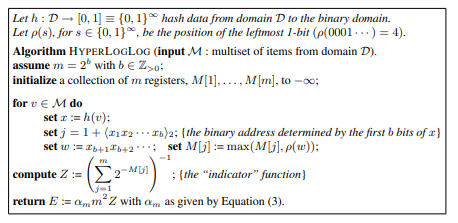

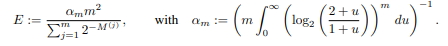

<center>La formula per il calcolo della cardinalità puo essere riscritta come</center> 

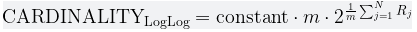

<center>dove la costante equivale ad $\alpha_m$ e vale 0.7942</center>

In [88]:
SIZE=32
def hyper_log_log_version2(f):
   
    stringhe=f.read().split('\n')
    bucket=[[]for i in range (SIZE)]#32 bucket ??
    bucket_index=0

    for line in range(len(stringhe)):
        a=hash_function_2(stringhe[line],n,A)
        
        
        #the binary address determined by the first 5 bits of x determine the bucket index
        #togliamo 1+ perchè i bucket partono da 0
        #quindi il bucket 0 è il M[1] della figura
        #e il bucket 31 è il M[32] della figura
        bucket_index= int(a[:5],2)
        
        cont_zero=0 #contatori di zeri
        j=5 #indice per il conteggio degli zeri
        #devo inserire nel bucket il numero di zeri contati da sinistra
        
        while a[j]== '0':
            cont_zero +=1
            j +=1
         
        
        #se il bucket nella posizione bucket_index è vuoto
        #aggiungo il numero di zeri che ho contato
        #se il bucket in quella posizione ha già un valore
        #scelgo il massimo tra il valore presente nel bucket e quello calcolato
        
        if not bucket[bucket_index]: 
            bucket[bucket_index]=cont_zero
        else :
            bucket[bucket_index]=max(bucket[bucket_index],cont_zero)
    
    #la cardinalità è data da 2^(media armonica del numero di zeri)
    print(bucket)
    lista=[]
    for b in bucket:
        if b!=[] and b>0:
            lista.append(b)
            
    s=0
    for elem in lista:
        s+=2**(-elem)
    s=s**(-1)
    card=0.79402*(SIZE**2)*s
    #errore
    err=1.04/math.sqrt(SIZE)
    return card,err

# Tentativo con 2 milioni di righe

In [89]:
f.close()

In [90]:
f=open('hash_2_mln.txt','r')

In [91]:
card,err=hyper_log_log_version2(f)

[16, 17, 12, 17, 19, 14, 19, 19, 17, 16, 15, 16, 15, 15, 16, 15, 15, 18, 18, 16, 15, 21, 17, 16, 17, 16, 17, 20, 20, 15, 17, 18]


In [92]:
card

1163921.478624546

In [93]:
err

0.18384776310850234

## risultato plausibile,ma da riguardare
## rivedere problema 32 bit!!

# Costruire file prova

In [59]:
file=open('hash.txt','r')

In [61]:
from tqdm import tqdm
l=[]
for i in tqdm(range(2000000)):
    l.append(file.readline())        

100%|████████████████████████████| 2000000/2000000 [00:02<00:00, 719758.29it/s]
